# Mean-Variance Model

I will be using the follwing acronyms to refer to the two different types of portfolios:
1. **Basic Portfolio**: Portfolio without Risk-Free Rate
2. **RFR Portfolio**: Portfolio with Risk-Free Rate
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('resources/MVM_data.csv')
r = 0.04
R = np.full(6, r)
mu = data['mu'].to_numpy()
cov = data.iloc[:, 2:].to_numpy()
icov = np.linalg.inv(cov)

In [20]:
v1 = icov.sum(axis=1)
vm = np.matmul(icov, mu)
wg = v1/v1.sum()
wd = vm/vm.sum()

vt = vm - R*v1
wt = vt/vt.sum()

In [21]:
zg = np.dot(np.transpose(mu), wg)
zd = np.dot(np.transpose(mu), wd)
varg = np.matmul(np.matmul(np.transpose(wg), cov), wg)
vard = np.matmul(np.matmul(np.transpose(wd), cov), wd)

zt = np.dot(np.transpose(mu), wt)
vart = np.matmul(np.matmul(np.transpose(wt), cov), wt)

In [22]:
variable_dict = {
    'Variable': ['r', 'R', 'mu', 'cov', 'icov',
                 'v1', 'vm', 'wg', 'wd', 'vt', 'wt',
                 'zg', 'varg', 'zd', 'vard', 'zt', 'vart'],
    'Value': [r, R, mu, cov, icov,
              v1, vm, wg, wd, vt, wt,
              zg, varg, zd, vard, zt, vart]
}

# Create a DataFrame from the dictionary
variable_df = pd.DataFrame(variable_dict).set_index('Variable')
variable_df.style.set_properties(**{'text-align': 'left'})

,Value
Variable,
r,0.040000
R,[0.04 0.04 0.04 0.04 0.04 0.04]
mu,[1.13 0.76 0.41 0.82 1.13 0.6 ]
cov,[[37.58 22.54 11.07 22.85 31. 15.92] [22.54 23.8 6.16 14.9 20.58 12.47] [11.07 6.16 10.47 6.84 10.28 5.99] [22.85 14.9 6.84 25.3 21.87 12.16] [31. 20.58 10.28 21.87 38.22 17. ] [15.92 12.47 5.99 12.16 17. 23.31]]
icov,[[ 0.1252211 -0.04740973 -0.03641612 -0.03610885 -0.04642179 0.00189044] [-0.04740973 0.1051588 0.01181174 -0.00456428 -0.01158099 -0.01608499] [-0.03641612 0.01181174 0.14337668 0.00301264 -0.01224979 -0.01092927] [-0.03610885 -0.00456428 0.00301264 0.09527584 -0.01951833 -0.00913852] [-0.04642179 -0.01158099 -0.01224979 -0.01951833 0.09136813 -0.01540495] [ 0.00189044 -0.01608499 -0.01092927 -0.00913852 -0.01540495 0.0690244 ]]
v1,[-0.03924496 0.03733054 0.09860588 0.0289585 -0.01380771 0.01935711]
vm,[0.00960621 0.00471028 0.00868168 0.0075507 0.0117174 0.00194407]
wg,[-0.2991246 0.28453295 0.7515728 0.22072136 -0.1052422 0.14753969]
wd,[0.2172843 0.10654248 0.19637222 0.17079023 0.26503759 0.04397318]


## Utility Function

In [6]:
lamb = np.linspace(-2, 2, 400)

### Basic Portfolio

Optimal Lambda:  0.5563909774436091


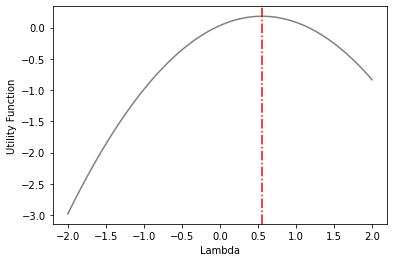

In [7]:
b_zlamb = zg + np.dot(lamb, (zd-zg))
b_varlamb = varg + np.dot(lamb**2, (vard - varg))

b_f = b_zlamb - 0.04*b_varlamb
b_index = b_f.argmax()
print("Optimal Lambda: ", lamb[b_index])

plt.plot(lamb, b_f, c='gray')
plt.axvline(x=lamb[b_index], c='red', linestyle='-.')

plt.xlabel('Lambda')
plt.ylabel('Utility Function')

plt.show()

### RFR Portfolio

Optimal Lambda:  0.48621553884711766


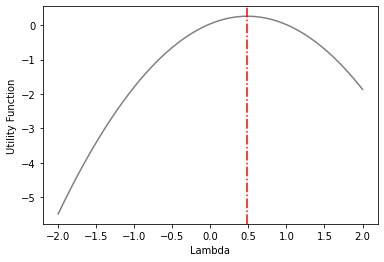

In [8]:
zlamb = r + (zt-r) * lamb
varlamb = lamb**2 * vart

# Utility function
f = zlamb - 0.04*varlamb
index = f.argmax()
print("Optimal Lambda: ", lamb[index])

plt.plot(lamb, f, c='gray')
plt.axvline(x=lamb[index], c='red', linestyle='-.')

plt.xlabel('Lambda')
plt.ylabel('Utility Function')

plt.show()

## Plot Portfolios

Optimal Portfolio Weights w/o R: 
 [-0.01179935  0.18550066  0.44266421  0.19294013  0.10077813  0.08991622]
Optimal Portfolio Weights: 
 R: 0.5137844611528823 [0.13946664 0.04014601 0.05911913 0.07977087 0.15311503 0.01459787]


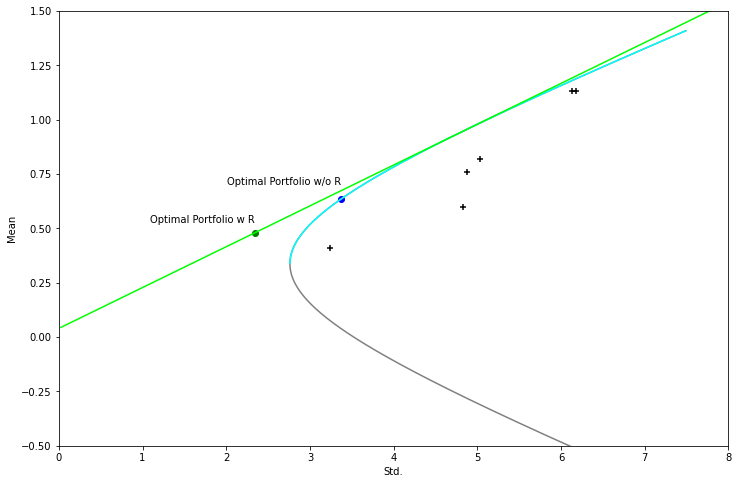

In [9]:
plt.figure(figsize=(12, 8))

# Frontier w/o R
plt.plot(np.sqrt(b_varlamb), b_zlamb, c='gray')

# Efficient Frontier w/o R
plt.plot(np.sqrt(np.split(b_varlamb, 2)[1]), np.split(b_zlamb, 2)[1], c='aqua')

# Efficient Frontier
plt.plot(np.sqrt(np.split(varlamb, 2)[1]), np.split(zlamb, 2)[1], c='lime')

# Stocks
variances = cov.diagonal()
plt.scatter(np.sqrt(variances), mu, c='black', marker='+')

# Optimal Porfolio w/o R
plt.scatter(np.sqrt(b_varlamb[b_index]), b_zlamb[b_index], c='blue')
plt.text(np.sqrt(b_varlamb[b_index]), 1.1*b_zlamb[b_index], f'Optimal Portfolio w/o R', ha='right')

# Optimal Portfolio
plt.scatter(np.sqrt(varlamb[index]), zlamb[index], c='green')
plt.text(np.sqrt(varlamb[index]), 1.1*zlamb[index], f'Optimal Portfolio w R', ha='right')

# Optimal Portfolio Weights w/o R
b_wo = wg + lamb[b_index]*(wd-wg)
print("Optimal Portfolio Weights w/o R: \n", b_wo)

# Optimal Portfolio Weights
wo = lamb[index]*wt
print("Optimal Portfolio Weights: \n", f"R: {(1-lamb[index])}", wo)

plt.xlim(0, 8)
plt.ylim(-0.5,1.5)
plt.xlabel('Std.')
plt.ylabel('Mean')

plt.show()

## Risk Decomposition

### Basic Portfolio

In [10]:
b_risk_decomp = pd.DataFrame(columns=['Mu', 'Var', 'Lambda', 'Inevitable', 'Efficient', 'Systematic', 'Diversifiable'])

In [11]:
b_risk_decomp['Mu'] = mu
b_risk_decomp['Var'] = variances
b_risk_decomp['Lambda'] = (mu-zg)/(zd-zg)
b_risk_decomp['Efficient'] = varg + b_risk_decomp['Lambda']**2*(vard-varg)
b_risk_decomp['Inevitable'] = varg
b_risk_decomp['Systematic'] = b_risk_decomp['Efficient'] - b_risk_decomp['Inevitable']
b_risk_decomp['Diversifiable'] = b_risk_decomp['Var'] - b_risk_decomp['Efficient']

In [12]:
b_wo_row ={'Mu': b_zlamb[b_index],
            'Var': b_varlamb[b_index],
            'Lambda': lamb[b_index],
            'Inevitable': varg,
            'Efficient': varg + b_zlamb[b_index]**2*(vard-varg),
            'Systematic': (b_varlamb[b_index]-varg),
            'Diversifiable': 0}
b_wo_row = pd.DataFrame(b_wo_row, index=['b_wo'])
b_risk_decomp = pd.concat([b_risk_decomp, b_wo_row])

In [13]:
b_risk_decomp

,Mu,Var,Lambda,Inevitable,Efficient,Systematic,Diversifiable
0,1.130000,37.58000,1.479616,7.621988,34.162799,26.540811,3.417201
1,0.760000,23.80000,0.789278,7.621988,15.174242,7.552254,8.625758
2,0.410000,10.47000,0.136256,7.621988,7.847064,0.225076,2.622936
3,0.820000,25.30000,0.901225,7.621988,17.468505,9.846517,7.831495
4,1.130000,38.22000,1.479616,7.621988,34.162799,26.540811,4.057201
5,0.600000,23.31000,0.490754,7.621988,10.541726,2.919738,12.768274
b_wo,0.635179,11.37497,0.556391,7.621988,12.513119,3.752982,0.000000


### RFR Portfolio

In [14]:
risk_decomp = pd.DataFrame(columns=['Mu', 'Var', 'Lambda', 'Inevitable', 'Efficient', 'Systematic', 'Diversifiable'])

In [15]:
risk_decomp['Mu'] = mu
risk_decomp['Var'] = variances
risk_decomp['Lambda'] = (mu-R)/(zt-R)
risk_decomp['Efficient'] = risk_decomp['Lambda']**2*(vart)
risk_decomp['Inevitable'] = "-"
risk_decomp['Systematic'] = risk_decomp['Efficient']
risk_decomp['Diversifiable'] = risk_decomp['Var'] - risk_decomp['Efficient']

In [16]:
wo_row ={'Mu': zlamb[index],
         'Var': varlamb[index],
         'Lambda': lamb[index],
         'Inevitable': "-",
         'Efficient': lamb[index]**2*vart,
         'Systematic': lamb[index]**2*vart,
         'Diversifiable': 0}
wo_row = pd.DataFrame(wo_row, index=['wo'])
risk_decomp = pd.concat([risk_decomp, wo_row])

In [17]:
risk_decomp

,Mu,Var,Lambda,Inevitable,Efficient,Systematic,Diversifiable
0,1.130000,37.580000,1.204244,-,33.689582,33.689582,3.890418
1,0.760000,23.800000,0.795464,-,14.699671,14.699671,9.100329
2,0.410000,10.470000,0.408780,-,3.881915,3.881915,6.588085
3,0.820000,25.300000,0.861753,-,17.251697,17.251697,8.048303
4,1.130000,38.220000,1.204244,-,33.689582,33.689582,4.530418
5,0.600000,23.310000,0.618694,-,8.892394,8.892394,14.417606
wo,0.480089,5.491921,0.486216,-,5.491921,5.491921,0.000000
